In [262]:
import pandas as pd

In [263]:
routes = pd.read_csv("kaarina_routes_2024-04-16.csv")
kaarina = pd.read_csv("Kaarina Kaarina 5.3.2024 - 15.4.2024_1a491af2-433f-4df9-80ec-044817912cc4.csv")

In [264]:
import numpy as np
# Muunetaan "-" NaN arvoksi
kaarina = kaarina.replace('-',np.NaN)
kaarina["Date"] = kaarina["Vuosi"].astype(str) + "-" + kaarina["Kuukausi"].astype(str) + "-" +  kaarina["Päivä"].astype(str) + " " + kaarina["Aika [UTC]"]
kaarina["Date"] = pd.to_datetime(kaarina["Date"])
kaarina["Hengitettävät hiukkaset <10 µm [µg/m3]"] = kaarina["Hengitettävät hiukkaset <10 µm [µg/m3]"].astype(float)
kaarina.dtypes

C:\Users\N3680\AppData\Local\Temp\ipykernel_13244\106727308.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  kaarina = kaarina.replace('-',np.NaN)


Havaintoasema                                     object
Vuosi                                              int64
Kuukausi                                           int64
Päivä                                              int64
Aika [UTC]                                        object
Hengitettävät hiukkaset <10 µm [µg/m3]           float64
Pienhiukkaset <2.5 µm [µg/m3]                    float64
Date                                      datetime64[ns]
dtype: object

In [279]:
import datetime
routes["endTime"] = pd.to_datetime(routes["endTime"])
routes["startTime"] = pd.to_datetime(routes["startTime"])
duration_hours = (routes["endTime"] - routes["startTime"]).dt.total_seconds() / 3600

duration_by_day = duration_hours.groupby(routes['endTime'].dt.to_period('d')).sum()
duration_by_hour = duration_hours.groupby(routes['endTime'].dt.to_period('h')).sum()

durations = duration_hours.groupby(routes['endTime']).sum()
duration_by_day.index = duration_by_day.index.to_timestamp()
duration_by_hour.index = duration_by_hour.index.to_timestamp()
duration_by_day

C:\Users\N3680\AppData\Local\Temp\ipykernel_13244\3831537671.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  duration_by_day = duration_hours.groupby(routes['endTime'].dt.to_period('d')).sum()
C:\Users\N3680\AppData\Local\Temp\ipykernel_13244\3831537671.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  duration_by_hour = duration_hours.groupby(routes['endTime'].dt.to_period('h')).sum()


endTime
2024-03-14    1.719722
2024-03-27    0.587778
2024-03-28    1.673056
2024-03-29    4.297222
2024-04-11    0.589444
dtype: float64

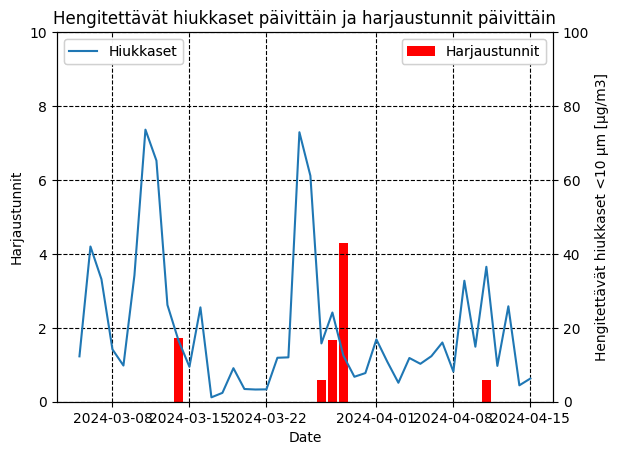

In [266]:
import matplotlib.pyplot as plt
df2 = kaarina[["Date", "Hengitettävät hiukkaset <10 µm [µg/m3]"]].set_index('Date').groupby(pd.Grouper(freq='d')).mean().dropna(how='all')
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(duration_by_day.index, duration_by_day.values, label="Harjaustunnit", color="red")
ax2.plot(df2, label="Hiukkaset")
legend1 = ax1.legend(loc='upper right')
legend2 = ax2.legend(loc='upper left')
ax1.add_artist(legend1)
ax2.add_artist(legend2)
ax1.grid(color="black", linestyle="dashed")
ax2.set_ylabel("Hengitettävät hiukkaset <10 µm [µg/m3]")
ax1.set_ylabel("Harjaustunnit")
plt.title("Hengitettävät hiukkaset päivittäin ja harjaustunnit päivittäin")
ax1.set_xlabel("Date")
ax1.set_ylim(top=10)
ax2.set_ylim(0,100)
plt.show()

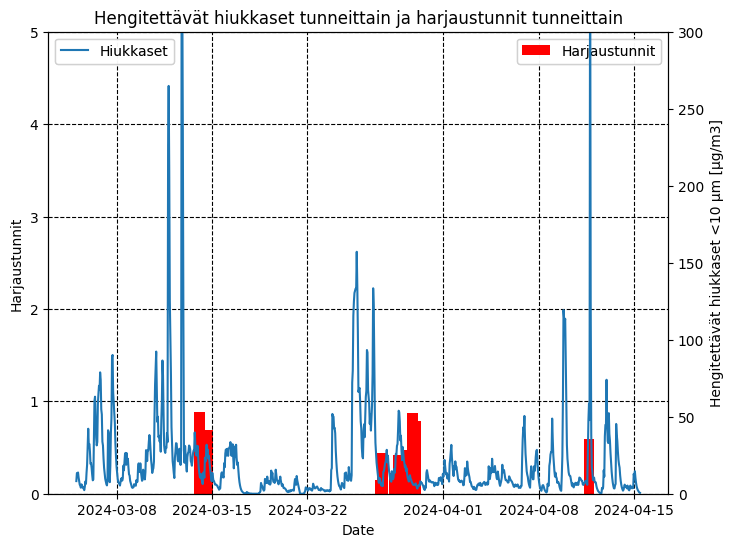

In [267]:
import matplotlib.pyplot as plt
df2 = kaarina[["Date", "Hengitettävät hiukkaset <10 µm [µg/m3]"]].set_index('Date').groupby(pd.Grouper(freq='h')).mean().dropna(how='all')
fig, ax1 = plt.subplots(figsize=(8,6))
ax2 = ax1.twinx()
ax1.bar(x=duration_by_hour.index, height=duration_by_hour.values, label="Harjaustunnit", color="red")
ax2.plot(df2, label="Hiukkaset")
legend1 = ax1.legend(loc='upper right')
legend2 = ax2.legend(loc='upper left')
ax1.add_artist(legend1)
ax2.add_artist(legend2)
ax1.grid(color="black", linestyle="dashed")
ax2.set_ylabel("Hengitettävät hiukkaset <10 µm [µg/m3]")
ax1.set_ylabel("Harjaustunnit")
plt.title("Hengitettävät hiukkaset tunneittain ja harjaustunnit tunneittain")
ax1.set_xlabel("Date")
ax1.set_ylim(top=5)
ax2.set_ylim(0,300)
plt.show()

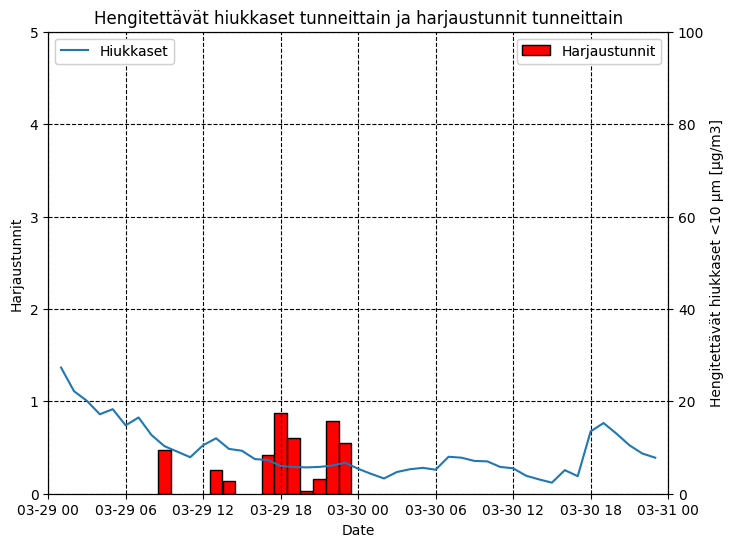

In [281]:
# Eniten harjausdataa sisältävän päivän tarkastelu 29-3-2024
from datetime import datetime
df2 = kaarina[["Date", "Hengitettävät hiukkaset <10 µm [µg/m3]"]].set_index('Date').groupby(pd.Grouper(freq='h')).mean().dropna(how='all')
df2
datetime_str = '03/29/24 00:00:00'
datetime_str2 = '03/31/24 00:00:00'

datetime_object = datetime.strptime(datetime_str, '%m/%d/%y %H:%M:%S')

datetime_object2 = datetime.strptime(datetime_str2, '%m/%d/%y %H:%M:%S')
df2 = df2[df2.index > datetime_object]
df2 = df2[df2.index < datetime_object2]

duration_by_hour_copy = duration_by_hour[duration_by_hour.index > datetime_object]
duration_by_hour_copy = duration_by_hour_copy[duration_by_hour_copy.index < datetime_object2]

duration_by_hour_copy

fig, ax1 = plt.subplots(figsize=(8,6))
ax2 = ax1.twinx()
ax1.bar(x=duration_by_hour_copy.index, height=duration_by_hour_copy.values, label="Harjaustunnit", color="red", width=0.04, edgecolor="black")
ax2.plot(df2, label="Hiukkaset")
legend1 = ax1.legend(loc='upper right')
legend2 = ax2.legend(loc='upper left')
ax1.add_artist(legend1)
ax2.add_artist(legend2)
ax1.grid(color="black", linestyle="dashed")
ax2.set_ylabel("Hengitettävät hiukkaset <10 µm [µg/m3]")
ax1.set_ylabel("Harjaustunnit")
plt.title("Hengitettävät hiukkaset tunneittain ja harjaustunnit tunneittain")
ax1.set_xlabel("Date")
ax1.set_ylim(top=5)
ax2.set_ylim(0,100)
ax1.set_xlim(datetime_object, datetime_object2)

plt.show()

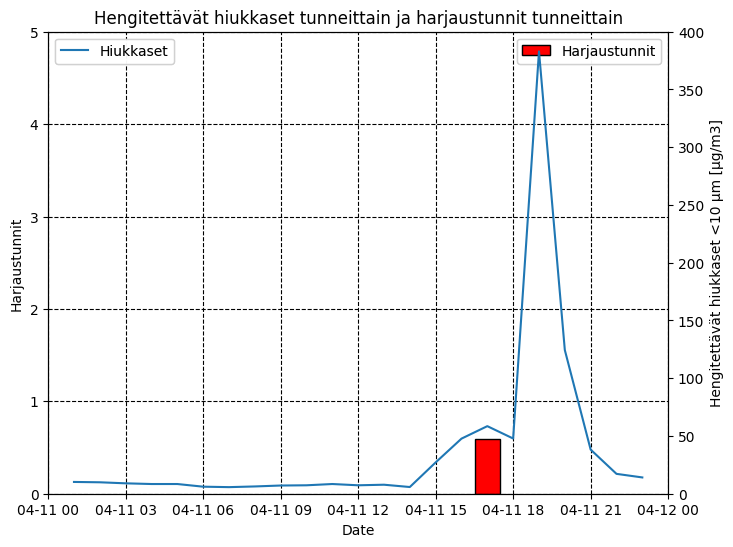

In [286]:
# Huomattavin korrelaatio 11.4.2024

df2 = kaarina[["Date", "Hengitettävät hiukkaset <10 µm [µg/m3]"]].set_index('Date').groupby(pd.Grouper(freq='h')).mean().dropna(how='all')
df2
datetime_str = '04/11/24 00:00:00'
datetime_str2 = '04/12/24 00:00:00'

datetime_object = datetime.strptime(datetime_str, '%m/%d/%y %H:%M:%S')

datetime_object2 = datetime.strptime(datetime_str2, '%m/%d/%y %H:%M:%S')
df2 = df2[df2.index > datetime_object]
df2 = df2[df2.index < datetime_object2]

duration_by_hour_copy = duration_by_hour[duration_by_hour.index > datetime_object]
duration_by_hour_copy = duration_by_hour_copy[duration_by_hour_copy.index < datetime_object2]

fig, ax1 = plt.subplots(figsize=(8,6))
ax2 = ax1.twinx()
ax1.bar(x=duration_by_hour_copy.index, height=duration_by_hour_copy.values, label="Harjaustunnit", color="red", width=0.04, edgecolor="black")
ax2.plot(df2, label="Hiukkaset")
legend1 = ax1.legend(loc='upper right')
legend2 = ax2.legend(loc='upper left')
ax1.add_artist(legend1)
ax2.add_artist(legend2)
ax1.grid(color="black", linestyle="dashed")
ax2.set_ylabel("Hengitettävät hiukkaset <10 µm [µg/m3]")
ax1.set_ylabel("Harjaustunnit")
plt.title("Hengitettävät hiukkaset tunneittain ja harjaustunnit tunneittain")
ax1.set_xlabel("Date")
ax1.set_ylim(top=5)
ax2.set_ylim(0,400)
ax1.set_xlim(datetime_object, datetime_object2)

plt.show()

In [303]:
# Puoli tuntia harjausta kello 17 alkavalla tunnilla
# duration_by_hour_copy
# df2
datetime_str = '04/11/24 00:00:00'
datetime_str2 = '04/12/24 00:00:00'

datetime_object = datetime.strptime(datetime_str, '%m/%d/%y %H:%M:%S')

datetime_object2 = datetime.strptime(datetime_str2, '%m/%d/%y %H:%M:%S')

routes_copy = routes[(routes["endTime"] > pd.to_datetime(datetime_object, utc=True))]
routes_copy
# Yksikään reitti ei ollut 100m säteellä
# Huomattava osa oli kuitenkin 500m säteellä
# Forecan mukaan Kaarinassa alkoi satamaan kello 17
# Sadetta 4/5 harjauspäivänä
# Sisällytä paikalliseen reittidataan myös id, jotta reitin todellista sisältöä voisi tarkastella helpommin

,startTime,endTime,direction,domain,source,1000m,500m,100m
218,2024-04-11 17:09:57+00:00,2024-04-11 17:12:07+00:00,NaN,state-roads,Harja/Väylävirasto,True,False,False
219,2024-04-11 17:12:07+00:00,2024-04-11 17:15:07+00:00,NaN,state-roads,Harja/Väylävirasto,True,False,False
220,2024-04-11 17:15:07+00:00,2024-04-11 17:18:07+00:00,NaN,state-roads,Harja/Väylävirasto,True,True,False
221,2024-04-11 17:18:07+00:00,2024-04-11 17:20:20+00:00,NaN,state-roads,Harja/Väylävirasto,True,True,False
222,2024-04-11 17:20:20+00:00,2024-04-11 17:23:02+00:00,NaN,state-roads,Harja/Väylävirasto,True,True,False
223,2024-04-11 17:23:02+00:00,2024-04-11 17:25:41+00:00,NaN,state-roads,Harja/Väylävirasto,True,True,False
224,2024-04-11 17:25:41+00:00,2024-04-11 17:28:08+00:00,NaN,state-roads,Harja/Väylävirasto,True,True,False
225,2024-04-11 17:28:08+00:00,2024-04-11 17:30:33+00:00,NaN,state-roads,Harja/Väylävirasto,True,True,False
226,2024-04-11 17:30:33+00:00,2024-04-11 17:33:33+00:00,NaN,state-roads,Harja/Väylävirasto,True,True,False
227,2024-04-11 17:33:33+00:00,2024-04-11 17:36:33+00:00,NaN,state-roads,Harja/Väylävirasto,True,True,False
